In [ ]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as opd


In [ ]:
opd.download('https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pasinduchinthana12
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri


100%|██████████| 86.8M/86.8M [00:00<00:00, 137MB/s]


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import os


In [ ]:
import ipywidgets as wid
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train =[]
y_train =[]
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor',]

for i in labels:
  folderPath = os.path.join('/content/brain-tumor-classification-mri/Training',i)

  for j in os.listdir(folderPath):
    img =cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size,image_size))
    X_train.append(img)
    y_train.append(i)

for i in labels:
  folderPath = os.path.join('/content/brain-tumor-classification-mri/Testing',i)

  for j in os.listdir(folderPath):
    img =cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size,image_size))
    X_train.append(img)
    y_train.append(i)

X_train =np.array(X_train)
y_train =np.array(y_train)

In [ ]:
X_train,y_train = shuffle(X_train,y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size =0.2,random_state = 101 )

In [ ]:
y_train_new = []
for i in y_train:
  y_train_new.append(labels.index(i))

y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
  y_test_new.append(labels.index(i))

y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation ='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation ='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation ='relu'))
model.add(Conv2D(64,(3,3),activation ='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation ='relu'))
model.add(Conv2D(128,(3,3),activation ='relu'))
model.add(Conv2D(128,(3,3),activation ='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation ='relu'))
model.add(Conv2D(256,(3,3),activation ='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(512,activation= 'relu'))
model.add(Dense(512,activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation ='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [30]:
history = model.fit(X_train,y_train, epochs = 20,validation_split =0.1)

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 510s 7s/step - accuracy: 0.9541 - loss: 0.1431 - val_accuracy: 0.8282 - val_loss: 0.5820
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 500s 7s/step - accuracy: 0.9455 - loss: 0.1673 - val_accuracy: 0.8321 - val_loss: 0.7414
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 504s 7s/step - accuracy: 0.9279 - loss: 0.1799 - val_accuracy: 0.8435 - val_loss: 0.5485
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 558s 7s/step - accuracy: 0.9630 - loss: 0.1076 - val_accuracy: 0.8550 - val_loss: 0.4284
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 503s 7s/step - accuracy: 0.9623 - loss: 0.1025 - val_accuracy: 0.8359 - val_loss: 0.5571
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 501s 7s/step - accuracy: 0.9721 - loss: 0.0928 - val_accuracy: 0.8397 - val_loss: 0.5500
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 501s 7s/step - accuracy: 0.9607 - loss: 0.1042 - val_accuracy: 0.8053 - val_loss: 0.5025
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 502s 7s/step - accuracy: 0.9769 - loss: 0.0703 - val_accuracy: 0.8473 - v

KeyboardInterrupt: 

In [31]:
model.save('braintumor.h5')

In [33]:
import matplotlib.pyplot as plt



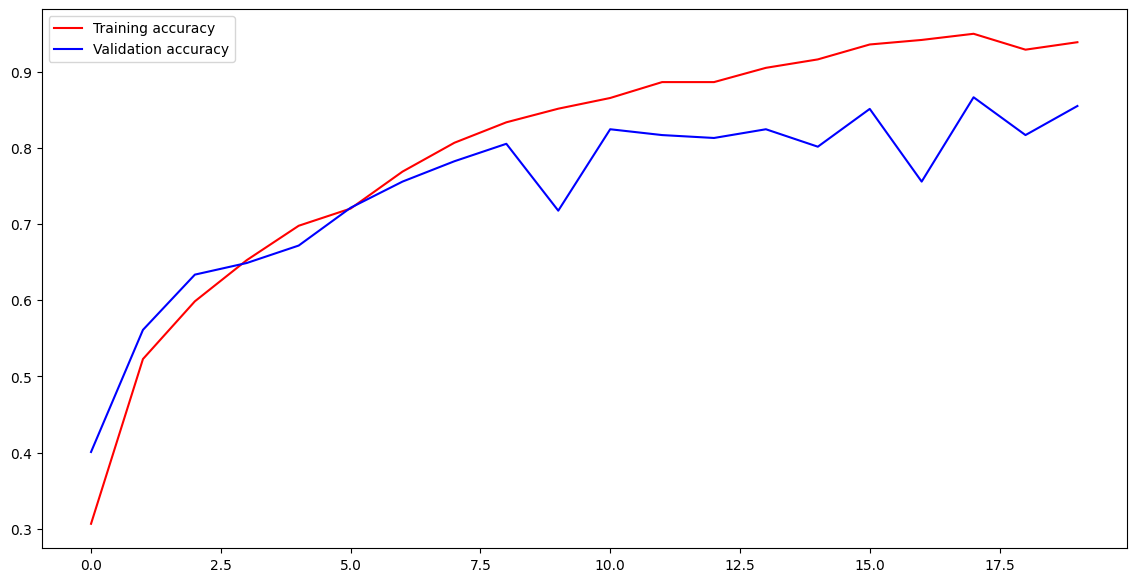

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label = 'Training accuracy')
plt.plot(epochs,val_acc,'b',label = 'Validation accuracy')
plt.legend(loc = 'upper left')
plt.show()

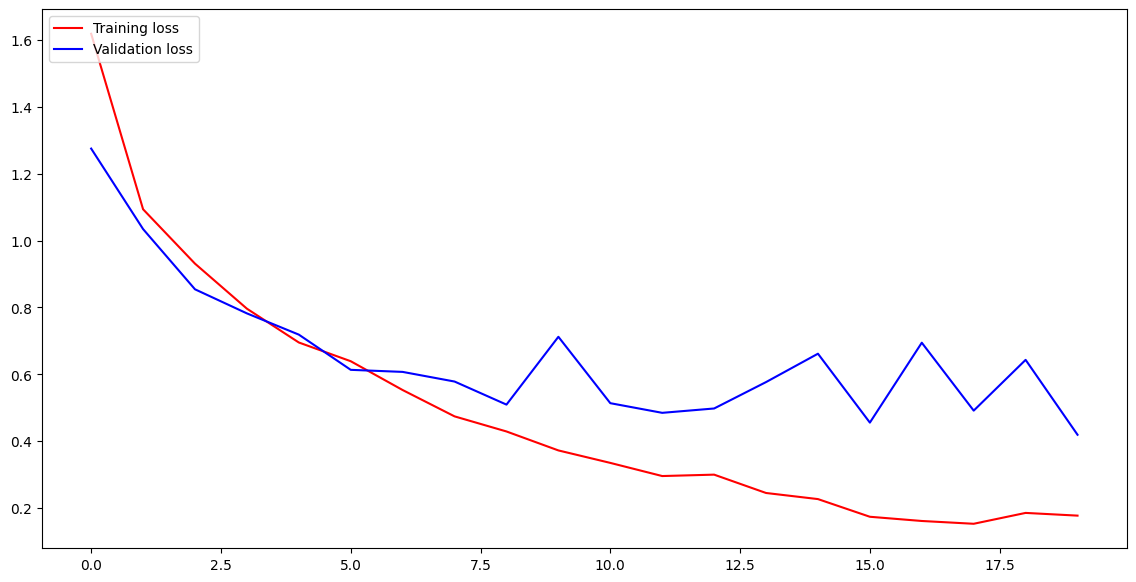

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.legend(loc = 'upper left')
plt.show()

In [41]:
img = cv2.imread('/content/brain-tumor-classification-mri/Testing/glioma_tumor/image(11).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [42]:
img_array =img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

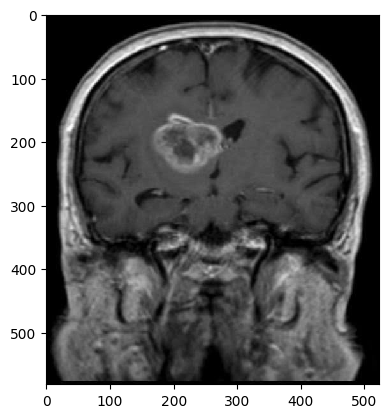

In [44]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/brain-tumor-classification-mri/Testing/glioma_tumor/image(11).jpg')
plt.imshow(img,interpolation = 'nearest')
plt.show()

In [45]:
a = model.predict(img_array)
indices = a.argmax()
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


0